This is my first project on Natural Language Processing (NLP). I have chosen the SMS Spam Dataset.
It contains the text of 5572 SMS messages and has them classified into two categories, 'spam' and 'ham'.

In this kernel I explore some common techniques of NLP like:

Removing Punctuation and Stopwords
Vectorization

I have also employed the following classifiers:

Logistic Regression
SVC
Multinomial NB
Decision Tree Classifier
KNeighbors Classifier
Random Forest Classifier
Ada Boost Classifier
Bagging Classifier
Extra Trees Classifier

Based on these classifiers, I have computed their accuracies and employed Voting Classifier to determine the best classifier.

All required libraries have to be imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

Import spam.csv file which contains the required dataset

In [2]:
import os
os.getcwd()

'C:\\Users\\Naren'

In [3]:
print(os.listdir())

['.bash_history', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.mchp_packs', '.mplabcomm', '.ssh', '3D Objects', 'Anaconda3', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'flashplayer32pp_jd_install.exe', 'Geospatial_Coordinates.csv', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'MicrosoftEdgeBackups', 'MPLABXProjects', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{7592620a-ba98-11e8-bc42-d25efba55db4}.TM.blf', 'NTUSER.DAT{7592620a-ba98-11e8-bc42-d25efba55db4}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{7592620a-ba98-11e8-bc42-d25efba55db4}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'Pictures', 'Police_Department_Incidents_-_Previous_Year__2016_.csv', 'PrintHood', 'Recent', 'Roaming', 'san-francisco.geojson', 'Saved Games', 'Searches', 'SendTo', 'Spam detection.ipynb', 'spam.csv', 'Start Menu', 'Te

In [4]:
df=pd.read_csv('spam.csv', encoding='-latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Some columns have no data and are irrelevant for our purpose, hence they can be deleted

In [5]:
df=df.drop({'Unnamed: 2','Unnamed: 3','Unnamed: 4'},axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Let us rename some cells for convenience

In [6]:
df=df.rename(columns={'v1':'label','v2':'message'})
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

The dataset has 4825 ham messages and 747 spam messages
Let us include a new column for the length of the message

In [8]:
df['length']=df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C861E5A5C0>,
      dtype=object)

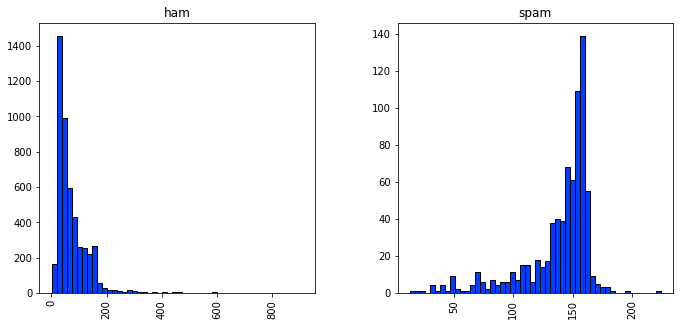

In [9]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
df.hist(column='length', by='label', bins=50,figsize=(11,5))

It is observed that spam messages are generally longer than ham messages. Spam messages are well above 100 words whereas ham messages are less than that

# Text processing
To process this dataset we will carry out the following NLP tasks: Tokenization and Vectorization

In [10]:
text = df['message'].copy()
text.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

# Removing stopwords and punctuations

Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages We import this library and download stopwords in English


In [11]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [12]:
text = text.apply(text_process)
text.head()

0    Go jurong point crazy Available bugis n great ...
1                              Ok lar Joking wif u oni
2    Free entry 2 wkly comp win FA Cup final tkts 2...
3                  U dun say early hor U c already say
4          Nah dont think goes usf lives around though
Name: message, dtype: object

# Vectorization
Transforming a bag of words representation into a vector representation is known as vectoriztion
By using CountVectorizer function we can convert text document to matrix of word count.


In [13]:
vectorizer = TfidfVectorizer("english")

In [14]:
features = vectorizer.fit_transform(text)
print(features)

  (0, 3764)	0.15705625796538664
  (0, 4652)	0.3454453072521403
  (0, 6381)	0.2701917502132373
  (0, 2482)	0.26752361109476797
  (0, 1401)	0.2626832171423389
  (0, 1864)	0.2918335915067389
  (0, 3861)	0.19227005405586492
  (0, 9107)	0.23822187576133733
  (0, 4809)	0.2918335915067389
  (0, 1862)	0.3297648855969494
  (0, 2198)	0.2918335915067389
  (0, 3821)	0.16228382867264401
  (0, 1168)	0.3454453072521403
  (0, 8871)	0.19696340342726038
  (1, 5946)	0.2741803362458879
  (1, 4848)	0.4080505634471753
  (1, 4620)	0.5233273701797004
  (1, 9003)	0.4313385731102942
  (1, 5978)	0.5462557824449175
  (2, 3556)	0.11502074336239428
  (2, 3141)	0.357098989337946
  (2, 9059)	0.18901418848789467
  (2, 2314)	0.19511125423377967
  (2, 9017)	0.14771585958627453
  (2, 3278)	0.4659793727203455
  :	:
  (5568, 4156)	0.3660732290385455
  (5568, 3783)	0.3636095248537397
  (5568, 3543)	0.5628210076825846
  (5568, 3169)	0.6457639024659789
  (5569, 5523)	0.4328299709057074
  (5569, 6307)	0.520467167163554
  (5569

# CLASSIFIERS
First we split the data in to test and train with 30% being alloted for testing

In [15]:
features_train, features_test, labels_train, labels_test = train_test_split(features, df['label'], test_size=0.3, random_state=111)

We import all the required classifiers

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [17]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [18]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

Let us define functions to fit our classifiers and make predictions

In [19]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [20]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [21]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [22]:
sc = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
sc

C:\Users\Naren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score
SVC,0.978469
KN,0.924641
NB,0.984450
DT,0.958732
LR,0.943182
RF,0.970096
AdaBoost,0.967105
BgC,0.967105
ETC,0.977273


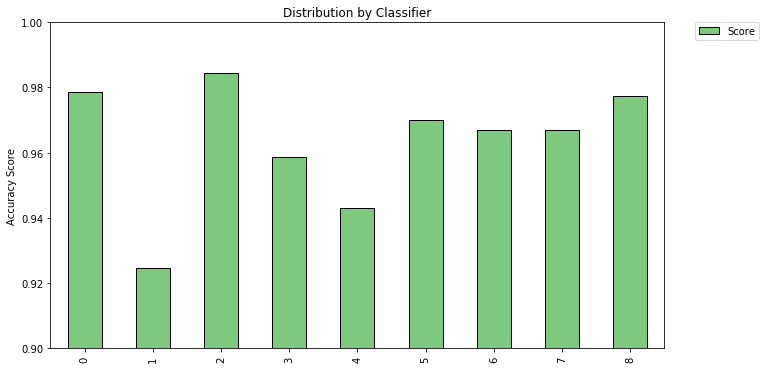

In [23]:
sc.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Stemmer
Stemming is the removal of short words and does no harm to the predicion

In [24]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [25]:
text = text.apply(stemmer)

In [26]:
features = vectorizer.fit_transform(text)

In [27]:
features_train, features_test, labels_train, labels_test = train_test_split(features, df['label'], test_size=0.3, random_state=111)

In [28]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [29]:
sc2 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score2'])
sc2 = pd.concat([sc,sc2],axis=1)
sc2

C:\Users\Naren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score,Score2
SVC,0.978469,0.978469
KN,0.924641,0.928230
NB,0.984450,0.985048
DT,0.958732,0.959928
LR,0.943182,0.946770
RF,0.970096,0.974880
AdaBoost,0.967105,0.970096
BgC,0.967105,0.968900
ETC,0.977273,0.977871


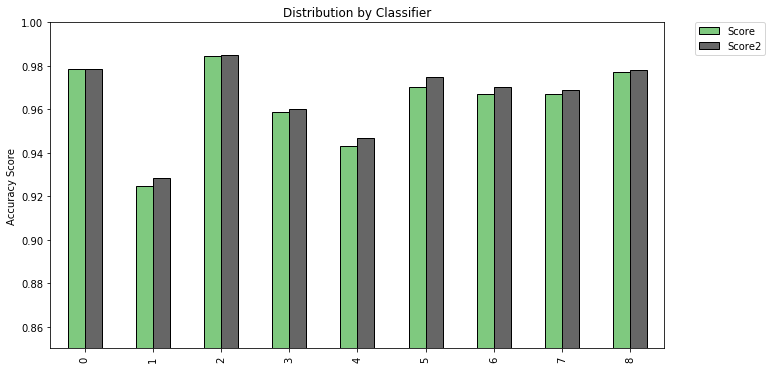

In [30]:
sc2.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Message length

In [31]:
lf = df['length'].as_matrix()
newfeat = np.hstack((features.todense(),lf[:, None]))

C:\Users\Naren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [32]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, df['label'], test_size=0.3, random_state=111)

In [33]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [35]:
sc3 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score3'])
sc3 = pd.concat([sc2,sc3],axis=1)
sc3

C:\Users\Naren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score,Score2,Score3
SVC,0.978469,0.978469,0.861244
KN,0.924641,0.928230,0.880383
NB,0.984450,0.985048,0.982656
DT,0.958732,0.959928,0.957536
LR,0.943182,0.946770,0.954545
RF,0.970096,0.974880,0.975478
AdaBoost,0.967105,0.970096,0.961722
BgC,0.967105,0.968900,0.962321
ETC,0.977273,0.977871,0.975478


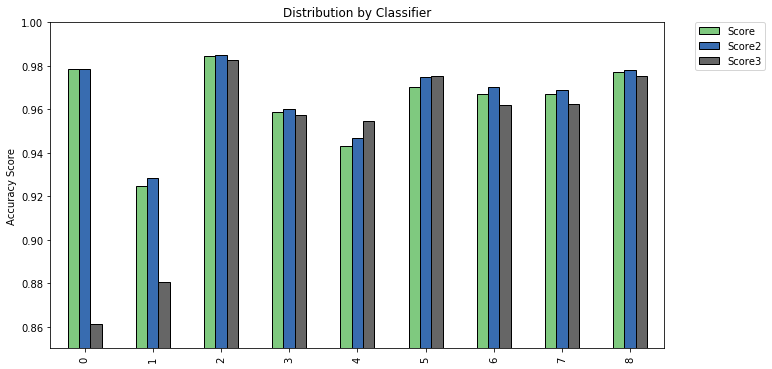

In [36]:
sc3.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

  # Voting Classifier
  Let us determine the best classifier

In [37]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('BgC', bc), ('ETC', etc), ('RF', rfc), ('Ada', abc)], voting='soft')

In [38]:
eclf.fit(features_train,labels_train)

VotingClassifier(estimators=[('BgC', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=9, n_jobs=1, oob_score=False, random_state=111,
         verbose=0, warm_start=False)), ('ETC', ExtraTreesClassifier(bootstrap=False,...hm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=62, random_state=111))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [39]:
pred = eclf.predict(features_test)

C:\Users\Naren\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [40]:
print(accuracy_score(labels_test,pred))

0.979066985645933


# Verdict
NaiveBayes is the best classifier